In [1]:
import pandas as pd
import pymol 
from pymol2 import PyMOL
from IPython.display import Image, display
import glob
import os
from pathlib import Path
%load_ext nglview     
import nglview as nv
from IPython.display import display, Markdown

boltz_dir = Path("/home/natasha/multimodal_model") / "outputs" / "boltz_out" 
pymol.finish_launching(['pymol', '-cq'])  # -c: no GUI, -q: quiet

# use different colours


The nglview module is not an IPython extension.


In [2]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [3]:
# Start a headless PyMOL session
pm = PyMOL()
pm.start()

def plot_structure(cif_path, name):
    name = os.path.splitext(os.path.basename(cif_path))[0]
    pm.cmd.load(cif_path, name)
    pm.cmd.hide("everything", name)
    pm.cmd.show("cartoon", name)
    pm.cmd.color("skyblue", name)

    png_path = f"{name}.png"
    pm.cmd.png(png_path, width=600, height=400, dpi=300, ray=False)
    
    # Display inline
    display(Image(png_path))
    
    # Clean up before the next loop
    #pm.cmd.delete("all")
    pm.stop()
    
    return 

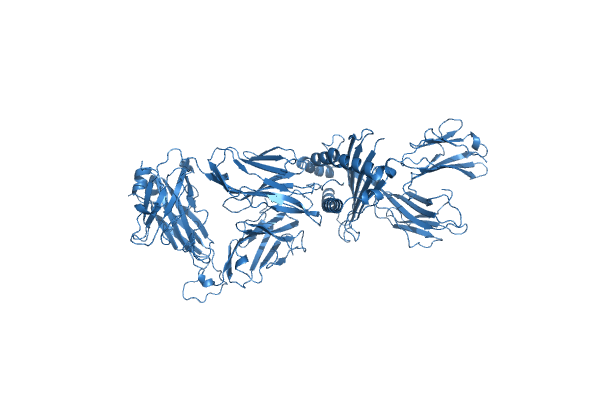

: 

In [ ]:
test = boltz_dir / "boltz_results_70W5_with_MSA" / "predictions" / "70W5" / "70W5_model_0.cif"
#test_without_msa = boltz_dir / "boltz_results_70W5" / "predictions" / "70W5" / "70W5_model_0.cif"
#test_missing_structure = boltz_dir / "boltz_results_70W5_test_missing" / "predictions" / "70W5_test_missing" / "70W5_test_missing_model_0.cif"

plot_structure(test, "test")

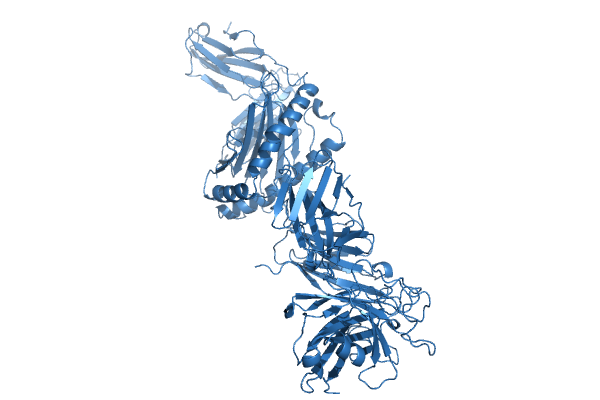

In [ ]:
test_without_msa = boltz_dir / "boltz_results_70W5" / "predictions" / "70W5" / "70W5_model_0.cif"
plot_structure(test_without_msa, "test_without_msa")


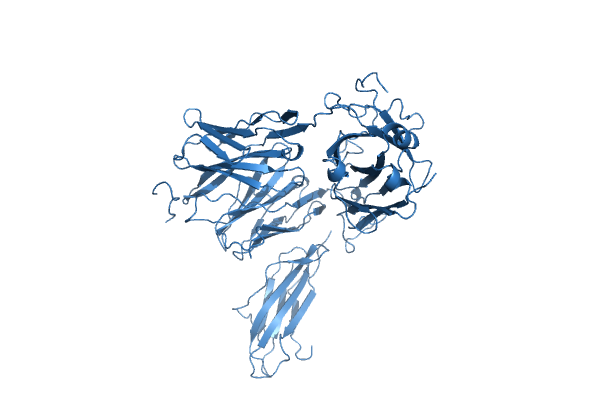

In [ ]:
test_missing_structure = boltz_dir / "boltz_results_70W5_test_missing" / "predictions" / "70W5_test_missing" / "70W5_test_missing_model_0.cif"

plot_structure(test_missing_structure, "test_missing_structure")

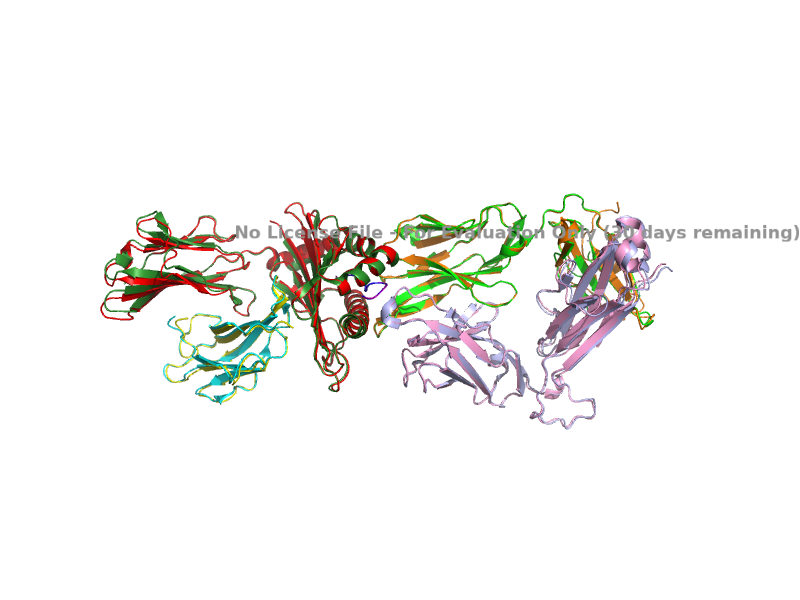

In [ ]:
from pymol2 import PyMOL
from pathlib import Path
from IPython.display import Image, display


# ————— Paths —————
boltz_dir = Path("/home/natasha/multimodal_model") / "outputs" / "boltz_out"
test_cif   = boltz_dir / "boltz_results_70W5_with_MSA" / "predictions" / "70W5" / "70W5_model_0.cif"
native_path = Path("/home/natasha/multimodal_model") 
native_cif = native_path / "7ow5.cif"  # adjust to full path if needed

# ————— Start Headless PyMOL —————
pm = PyMOL()
pm.start()

# ————— Load Structures —————
pm.cmd.load(str(native_cif), "native")
pm.cmd.load(str(test_cif),   "test")

# ————— Align test → native —————
# This superimposes “test” onto “native” so they overlap
pm.cmd.align("test", "native")

# ————— Representations —————
pm.cmd.hide("everything", "all")
pm.cmd.show("cartoon", "all")

# ————— Color by Chain —————
# Define your chains and two color‐pairs:
chains = ["A", "B", "C", "D", "E"]   # ← adjust to your actual chain IDs
native_colors = ["forest", "cyan", "blue", "green", "purple"]  
test_colors   = ["lime", "yellow", "grey", "orange", "pink"] # lighter/different shades for the test

for chain, c_native, c_test in zip(chains, native_colors, test_colors):
    sel_native = f"native and chain {chain}"
    sel_test   = f"test   and chain {chain}"
    pm.cmd.color(c_native, sel_native)
    pm.cmd.color(c_test,   sel_test)

# ————— Optional: transparency to see overlap —————
# pm.cmd.set("cartoon_transparency", 0.3, "test")  

# ————— Frame & Render —————
pm.cmd.zoom("all")
pm.cmd.orient("all")
out_png = "aligned_overlay.png"
pm.cmd.png(out_png, width=800, height=600, ray=1)

pm.stop()
display(Image(out_png))




In [ ]:
import nglview as nv
from IPython.display import display, Markdown

boltz_dir = Path("/home/natasha/multimodal_model") / "outputs" / "boltz_out" 
cif = boltz_dir / "boltz_results_70W5_with_MSA" / "predictions" / "70W5" / "70W5_model_0.cif"
print(cif)
#cif = "outputs/boltz_out/boltz_results_70W5_test_missing_2/…/confidence_70W5_test_missing_2_model_0.cif"
display(Markdown(f"### {cif}"))

view = nv.show_structure_file(cif)  
view.clear_representations()
view.add_cartoon()
view.add_ball_and_stick()
view.camera = 'orthographic'
display(view)


/home/natasha/multimodal_model/outputs/boltz_out/boltz_results_70W5_with_MSA/predictions/70W5/70W5_model_0.cif


### /home/natasha/multimodal_model/outputs/boltz_out/boltz_results_70W5_with_MSA/predictions/70W5/70W5_model_0.cif

AttributeError: 'PosixPath' object has no attribute 'endswith'